In [1]:
import cv2
import numpy as np
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.path as mplPath
import xml.etree.ElementTree as ET
import util2
from skimage import img_as_ubyte
from skimage.segmentation import find_boundaries

In [2]:
folderPageImages = 'parzivalDataset'; 
folderGroundThruth = 'groundTruth'
ximg_train = []; ximg_test = []; ximg_validation = [];
ximg_train_superpixels = [];
ximg_test_superpixels = [];
ximg_validation_superpixels = [];
ximgresized_train = []; ximgresized_test = []; ximgresized_validation = [];
xgt_train = []; xgt_test = []; xgt_validation = [];
x_train = []; y_train = []
x_test = []; y_test = []
x_va = []; y_va = []
x = []; y = []


#### Leyendo las imágenes de los documentos y sus respectivos archivos XML que contienen los segmentos (ground truth) como coordenadas de polígonos


In [3]:
ximg_train,      xgt_train      = util2.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'train')     
ximg_test,       xgt_test       = util2.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'test')
ximg_validation, xgt_validation = util2.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'validation')


####  Reduciendo las imágenes a escala

In [4]:
ximgresized_train = util2.resizeImages(ximg_train, 2**-3)
ximgresized_test = util2.resizeImages(ximg_train, 2**-3)
ximgresized_validation = util2.resizeImages(ximg_train, 2**-3)

index 7 to samples

#### Segmentando las imágenes en super píxeles, usando la técnica  SLIC

In [6]:
#a list of lists
ximg_train_superpixels = util2.segmentImageInSuperpixels([ximg_train[7]], 3000)

In [7]:
image = ximg_train[7]
imgSegmented = mark_boundaries(image.copy(), ximg_train_superpixels[0], color=(1, 0, 0), outline_color=(1, 0, 0))
util2.subplot(titles=['original','segmentado en superpíxeles'], images = [image, imgSegmented], rows = 1, imgPerRows = 2, size = 20)

In [8]:
imagePoints = imgSegmented.copy()
util2.paintCentralPointsOrPatchesSegments (imagePoints , ximg_train_superpixels[0], 6, 0, False)

In [9]:
util2.subplot(titles=['segmentado','puntos centrales'], images = [imgSegmented, imagePoints], rows = 1, imgPerRows = 2, size = 20)

In [10]:
# image, segments, radio, sizePatch, isPatch
importlib.reload(util2)
imagePatches = imagePoints.copy()
#imagePatches = img_as_ubyte(imagePatches)
util2.paintCentralPointsOrPatchesSegments (imagePatches , ximg_train_superpixels[0], 0, 28, True)

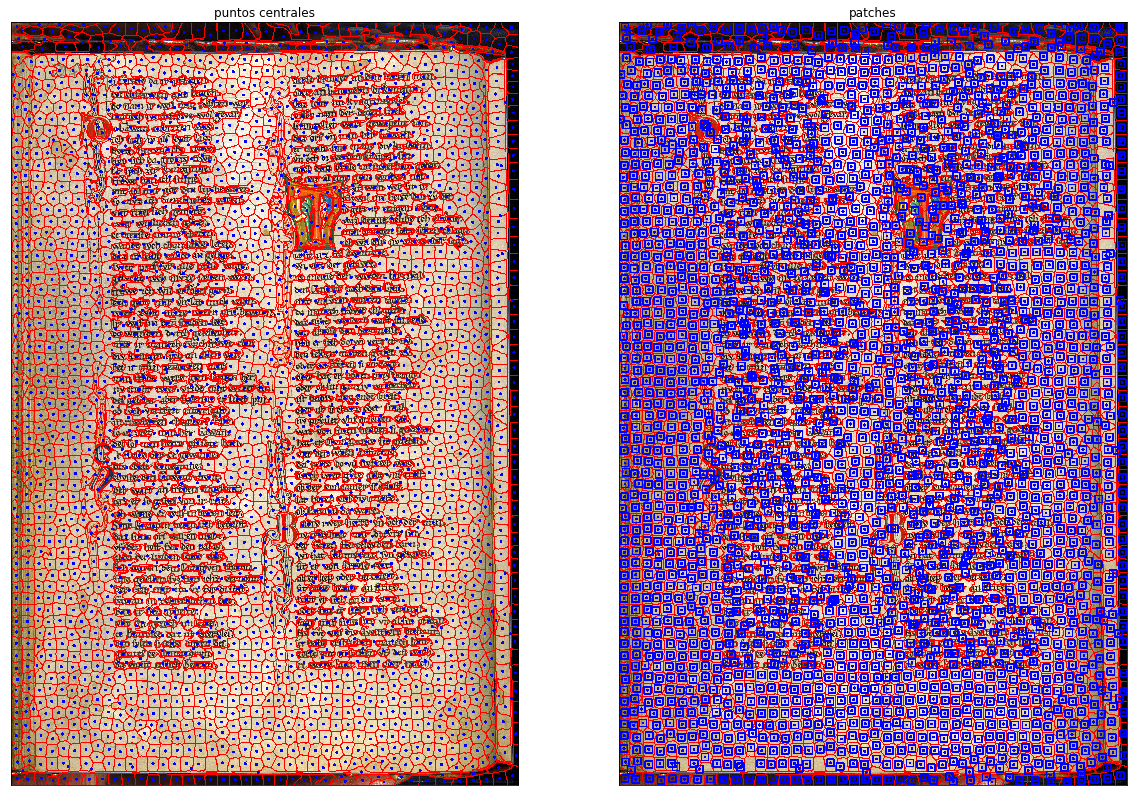

In [11]:
util2.subplot(titles=['puntos centrales','patches'], images = [imagePoints, imagePatches], rows = 1, imgPerRows = 2, size = 20)

### Obteniendo los super píxeles para todas las imágenes de entrenamiento, test y validación

In [ ]:
#ximg_train_superpixels      = util2.segmentImageInSuperpixels([ximg_train[7]], 3000)
#ximg_test_superpixels       = Util.segmentImageInSuperpixels([ximg_test[0]], 3000)
#ximg_validation_superpixels = Util.segmentImageInSuperpixels([ximg_validation[0]], 3000)

In [16]:
import importlib
importlib.reload(util2)
XTrain, XCentralPoints, listSuperPixelesProcessed = util2.doInputs([ximg_train[7]], ximg_train_superpixels, 28)

In [18]:
print(len(XTrain[0]))
print(len(listSuperPixelesProcessed[0]))
print(np.shape(XCentralPoints[0]))


2650
2650
(2650, 2)


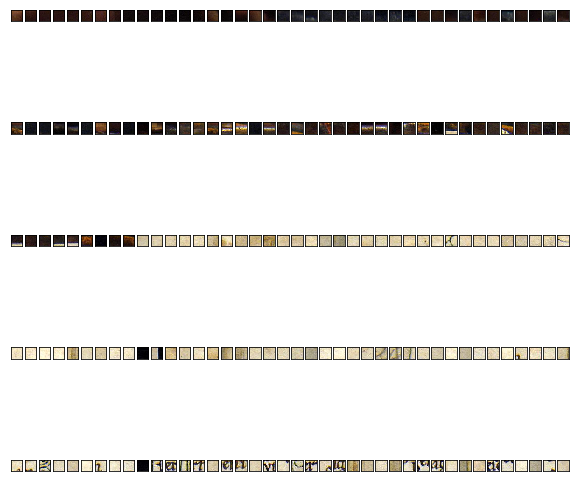

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(200):
    plt.subplot(5,40,i+1),plt.imshow(XTrain[0][i],'gray')
    plt.title("")
    plt.xticks([]),plt.yticks([])
plt.show()

In [20]:
Y = util2.doLabels([XCentralPoints[0]], [xgt_train[7]], folderGroundThruth, 'train')

len points: 2650
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons

len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text


len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration


len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len

len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len po

len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4

len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len

len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len po

len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polyg

len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Regio

len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Re

len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polyg

len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons

len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len po

len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment


len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Re

len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len 

len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Re

len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: tex

len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons

len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len po

len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: co

len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page


len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text


len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment


len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment


len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment
len polygons: 1 Region: page
len polygons: 2 Region: text
len polygons: 4 Region: decoration
len polygons: 0 Region: comment


In [21]:
print(np.shape([XCentralPoints[0]]))
print(np.shape([[xgt_train]]))
print(np.shape(Y[0]))

print(xgt_train[7])

(1, 2650, 2)
(1, 1, 24)
(2650,)
d-124_kai.chen@unifr.ch.xml


In [22]:
from collections import Counter
Counter(Y[0])
        

Counter({'decoration': 183, 'page': 1308, 'periphery': 173, 'text': 986})

In [26]:
#ximg_train_superpixels superpixels - list of lists
#[ximg_train[7]] image
#Y[0] labels for each superpixel
image = ximg_train[7]
vis = np.zeros(image.shape[:2], dtype="float")

superpixels = listSuperPixelesProcessed[0]
for (i, segVal) in enumerate(np.unique(superpixels)):
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[superpixels == segVal] = 255
    #'text','decoration','comment','page'
    if Y[0][i] == 'text' :
        vis[superpixels == segVal] = 1
    elif Y[0][i] == 'decoration' :
        vis[superpixels == segVal] = 1
    elif Y[0][i] == 'comment' :
        vis[superpixels == segVal] = 1
    elif Y[0][i] == 'page' :
        vis[superpixels == segVal] = 1
    elif Y[0][i] == 'periphery' :
        vis[superpixels == segVal] = 1

D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3008 but corresponding boolean dimension is 2650
D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3008 but corresponding boolean dimension is 2650
D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3008 but corresponding boolean dimension is 2650
D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3008 but corresponding boolean dimension is 2650
D:\wynpython_36_home\python-3.5.3.amd64\lib\site-packages\ipyker